In [1]:
pip install numpy matplotlib scikit-learn tensorflow opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl.metadata (540 bytes)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 3.2 MB/s eta 0:00:13
    --------------------------------------- 0.6/38.8 MB 7.5 MB/s eta 0:00:06
   - -------------------------------------- 1.3/38.8 MB 10.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.2/38.8 MB 12.9 MB/s eta 0:00:03
   --- ------------------------------------ 3.4/38.8 MB 15.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.8 MB 18.7 MB/s eta 0:00:02
   ------- -------------------------------- 7.0/38.8 MB 22.4 MB/s eta 0:00:02
   --------- ------------------------------ 9.5/38.8 MB 26.5 MB/s eta 0:00:02
   ------------- -------------------------- 13.0/38.8 MB 46.7 MB/s eta 0:00:01
   ------------------ --------------------- 17.6/38.8 MB 81.8 MB/s eta 0:0

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flwr 1.10.0 requires protobuf<5.0.0,>=4.25.2, but you have protobuf 4.23.4 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install mahotas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 991.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 5.0 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 6.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 7.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 7.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 7.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.5/1.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import cv2
import os
from sklearn.datasets import load_files
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import mahotas as mt

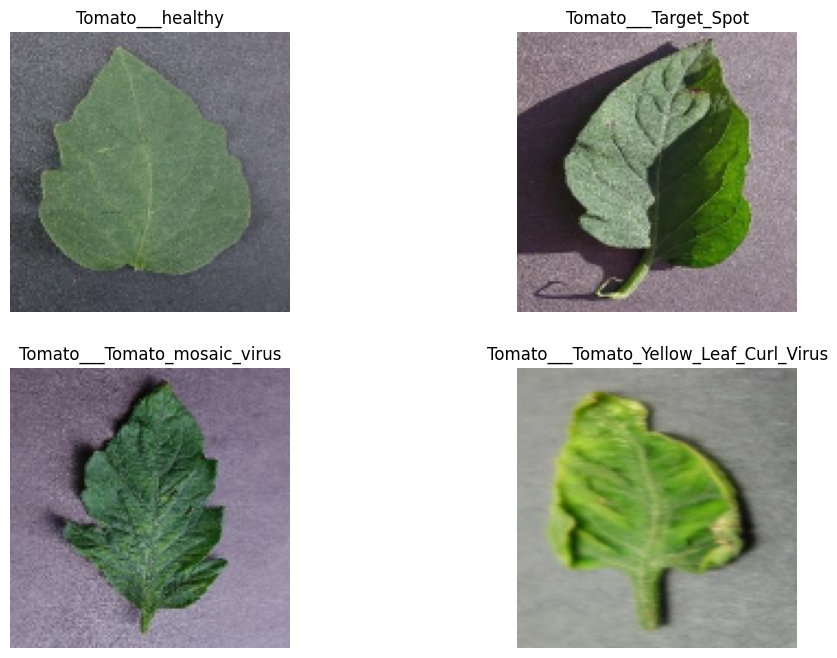

In [4]:
# Load and display dataset
def load_dataset(path):
    images = []
    labels = []
    target_names = os.listdir(path)
    for label, target_name in enumerate(target_names):
        label_dir = os.path.join(path, target_name)
        for filename in os.listdir(label_dir):
            filepath = os.path.join(label_dir, filename)
            img = cv2.imread(filepath)
            if img is not None:  # Check if the image is read successfully
                img = cv2.resize(img, (128, 128))  # Resizing to 128x128
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {filepath}")
    return images, labels, target_names

def display_samples(images, labels, target_names):
    unique_labels = set(labels)
    plt.figure(figsize=(12, 8))
    for i, label in enumerate(unique_labels):
        idx = labels.index(label)
        plt.subplot(2, 2, i + 1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(target_names[label])
        plt.axis('off')
    plt.show()

train_dir = r"C:\Users\Computing\Downloads\Tomato Disease"
images, labels, target_names = load_dataset(train_dir)
display_samples(images, labels, target_names)

In [10]:
# Feature extraction function
def extract_features(images):
    features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        textures = mt.features.haralick(gray).mean(axis=0)
        features.append(np.hstack([textures]))
    return np.array(features)

features = extract_features(images)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
labels_encoded = LabelEncoder().fit_transform(labels)

C:\Users\Computing\AppData\Local\Temp\ipykernel_2164\1602055230.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


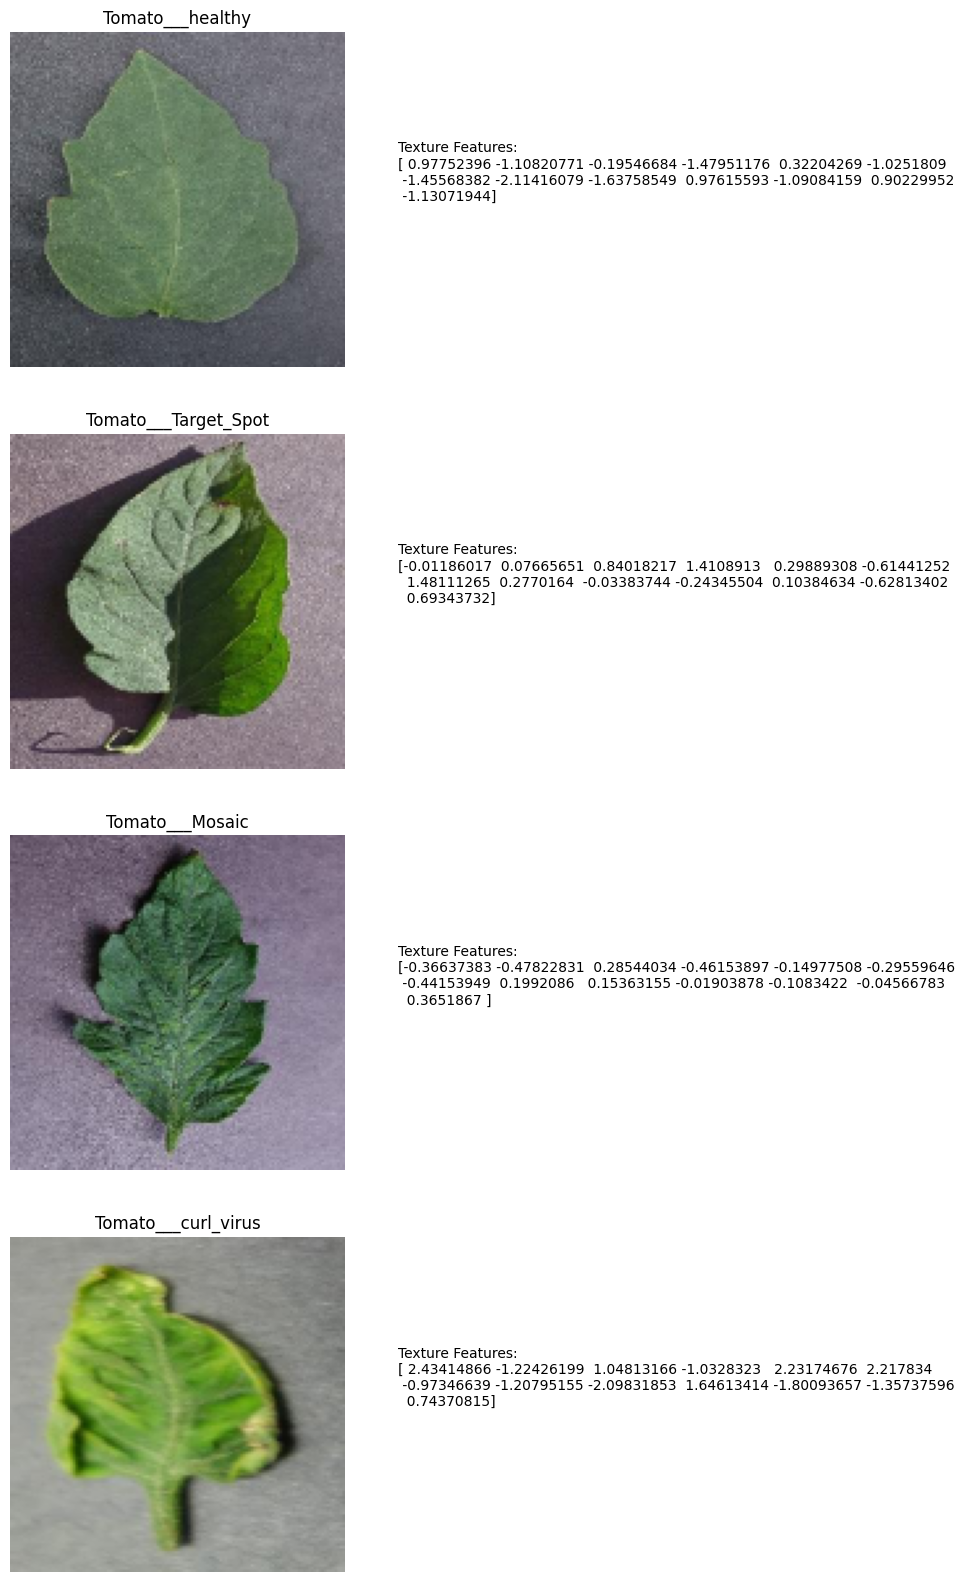

In [11]:
import matplotlib.pyplot as plt

# Define a mapping from numeric labels to actual labels
label_mapping = {
    0: 'Tomato___healthy',
    1: 'Tomato___Target_Spot',
    2: 'Tomato___Mosaic',
    3: 'Tomato___curl_virus'
}

# Create a dictionary to store one image and its texture features for each category
category_image_texture_map = {}

# Find one image and its texture features for each category
for i, label in enumerate(labels):
    category = label_mapping[label]
    if category not in category_image_texture_map:
        category_image_texture_map[category] = (images[i], features_scaled[i], label)
    
    if len(category_image_texture_map) == len(label_mapping):
        break

# Plot one image and its texture features for each category
num_categories = len(label_mapping)
plt.figure(figsize=(5, 5 * num_categories))
for i, (category, (image, texture_features, label)) in enumerate(category_image_texture_map.items()):
    plt.subplot(num_categories, 1, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'{category}')  # Display actual data label
    plt.axis('off')
    
    # Display texture features as text
    plt.text(image.shape[1] + 20, image.shape[0] // 2, f'Texture Features:\n{texture_features}', fontsize=10)

plt.tight_layout()
plt.show()



In [12]:
# Cross-validation and model training
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def train_model(model, params):
    grid = GridSearchCV(model, params, cv=kfold, scoring='f1_weighted', n_jobs=-1)
    grid.fit(features_scaled, labels_encoded)
    print(f"Best parameters for {model.__class__.__name__}: {grid.best_params_}")
    print(f"Best cross-validation score: {grid.best_score_}")
    return grid

# Models and parameters
models_params = {
    SVC(): {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100]},
    KNeighborsClassifier(): {'n_neighbors': [3, 5, 7, 9]},
    LogisticRegression(): {'C': [0.1, 1, 10]},
    RandomForestClassifier(): {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]},
    DecisionTreeClassifier(): {'max_depth': [5, 10, 15, 20]}
}

trained_models = {model.__class__.__name__: train_model(model, params) for model, params in models_params.items()}

Best parameters for SVC: {'C': 100, 'kernel': 'rbf'}
Best cross-validation score: 0.9150843061687282
Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score: 0.8878441850594208


C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for LogisticRegression: {'C': 10}
Best cross-validation score: 0.8448188218961932
Best parameters for RandomForestClassifier: {'max_depth': 20, 'n_estimators': 100}
Best cross-validation score: 0.9169999418724476
Best parameters for DecisionTreeClassifier: {'max_depth': 15}
Best cross-validation score: 0.8741053276778382


In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Splitting the dataset into train+validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    features_scaled, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

# Setting up cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def train_model(model, params):
    grid = GridSearchCV(model, params, cv=kfold, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train_val, y_train_val)  # Notice we use only X_train_val and y_train_val here
    print(f"Best parameters for {model.__class__.__name__}: {grid.best_params_}")
    print(f"Best cross-validation score: {grid.best_score_}")
    return grid

# Models and parameters
models_params = {
    SVC(): {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100]},
    KNeighborsClassifier(): {'n_neighbors': [3, 5, 7, 9]},
    LogisticRegression(): {'C': [0.1, 1, 10]},
    RandomForestClassifier(): {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]},
    DecisionTreeClassifier(): {'max_depth': [5, 10, 15, 20]}
}

# Train models using cross-validation
trained_models = {model.__class__.__name__: train_model(model, params) for model, params in models_params.items()}


Best parameters for SVC: {'C': 100, 'kernel': 'rbf'}
Best cross-validation score: 0.9105729667732445
Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score: 0.8780713056748397


C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for LogisticRegression: {'C': 10}
Best cross-validation score: 0.847760159298978
Best parameters for RandomForestClassifier: {'max_depth': 20, 'n_estimators': 100}
Best cross-validation score: 0.9086344682980336
Best parameters for DecisionTreeClassifier: {'max_depth': 20}
Best cross-validation score: 0.8595391300427908


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming svc_model is the GridSearchCV object for the SVC model
svc_best = trained_models['SVC'].best_estimator_

# Predict on the test data using the best estimator
y_pred_svc = svc_best.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy of SVC on test data: {accuracy_svc:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate precision, recall, specificity, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")




Accuracy of SVC on test data: 0.92
Precision: 0.99
Recall/Sensitivity: 0.98
Specificity: 0.99
F1 Score: 0.99


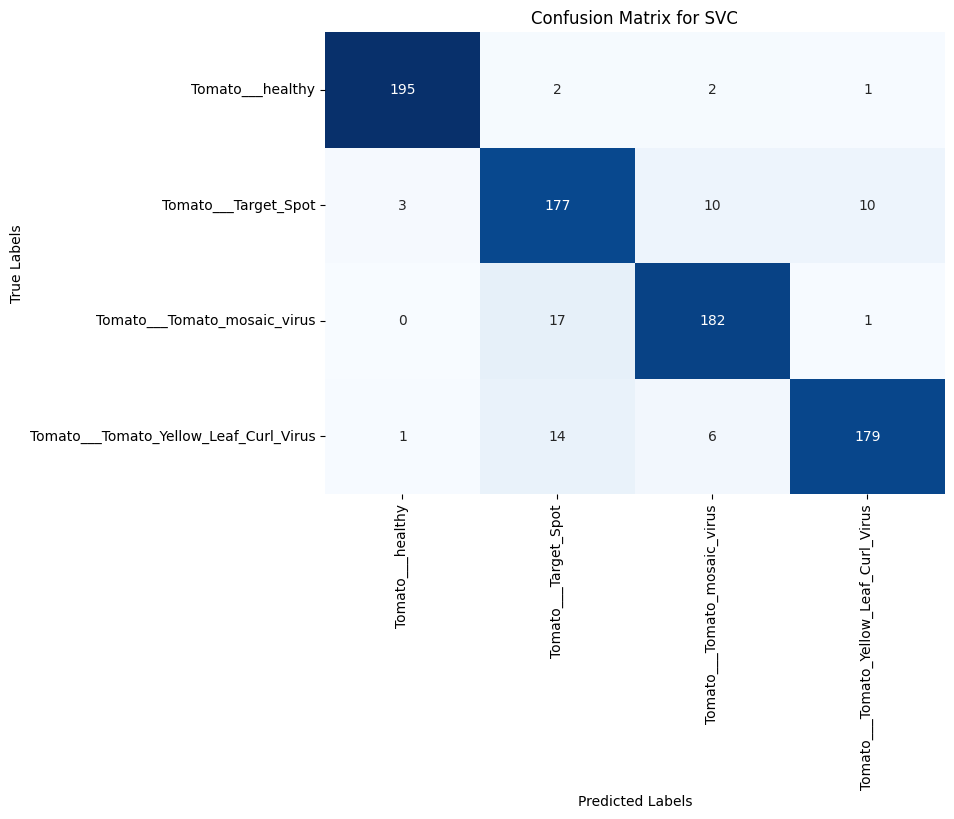

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming svc_model is the GridSearchCV object for the SVC model
svc_best = trained_models['SVC'].best_estimator_

# Predict on the test data using the best estimator
y_pred_svc = svc_best.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVC')
plt.show()



In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming knn_model is the GridSearchCV object for the KNN model
knn_best = trained_models['KNeighborsClassifier'].best_estimator_

# Predict on the test data using the best estimator
y_pred_knn = knn_best.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN on test data: {accuracy_knn:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate precision, recall, specificity, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy of KNN on test data: 0.87
Precision: 0.98
Recall/Sensitivity: 0.99
Specificity: 0.98
F1 Score: 0.98


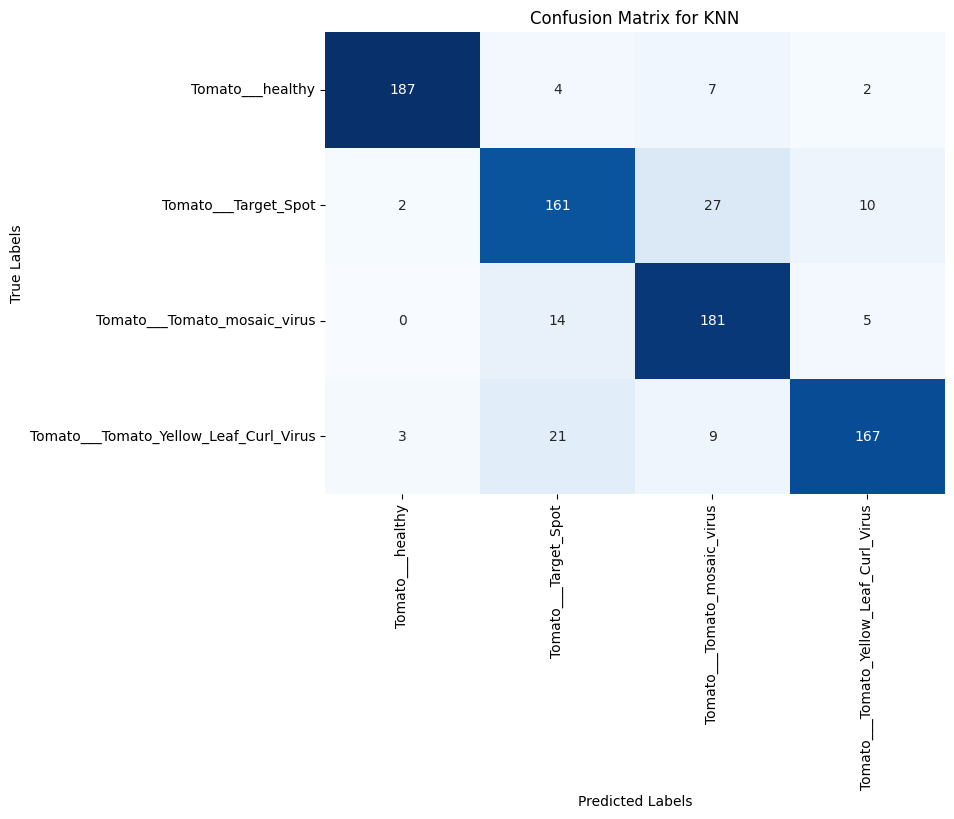

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming knn_model is the GridSearchCV object for the KNN model
knn_best = trained_models['KNeighborsClassifier'].best_estimator_

# Predict on the test data using the best estimator
y_pred_knn = knn_best.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')
plt.show()


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming logistic_regression_model is the GridSearchCV object for the Logistic Regression model
logistic_regression_best = trained_models['LogisticRegression'].best_estimator_

# Predict on the test data using the best estimator
y_pred_logistic_regression = logistic_regression_best.predict(X_test)

# Calculate accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"Accuracy of Logistic Regression on test data: {accuracy_logistic_regression:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic_regression)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate precision, recall, specificity, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")



Accuracy of Logistic Regression on test data: 0.83
Precision: 0.98
Recall/Sensitivity: 0.98
Specificity: 0.98
F1 Score: 0.98


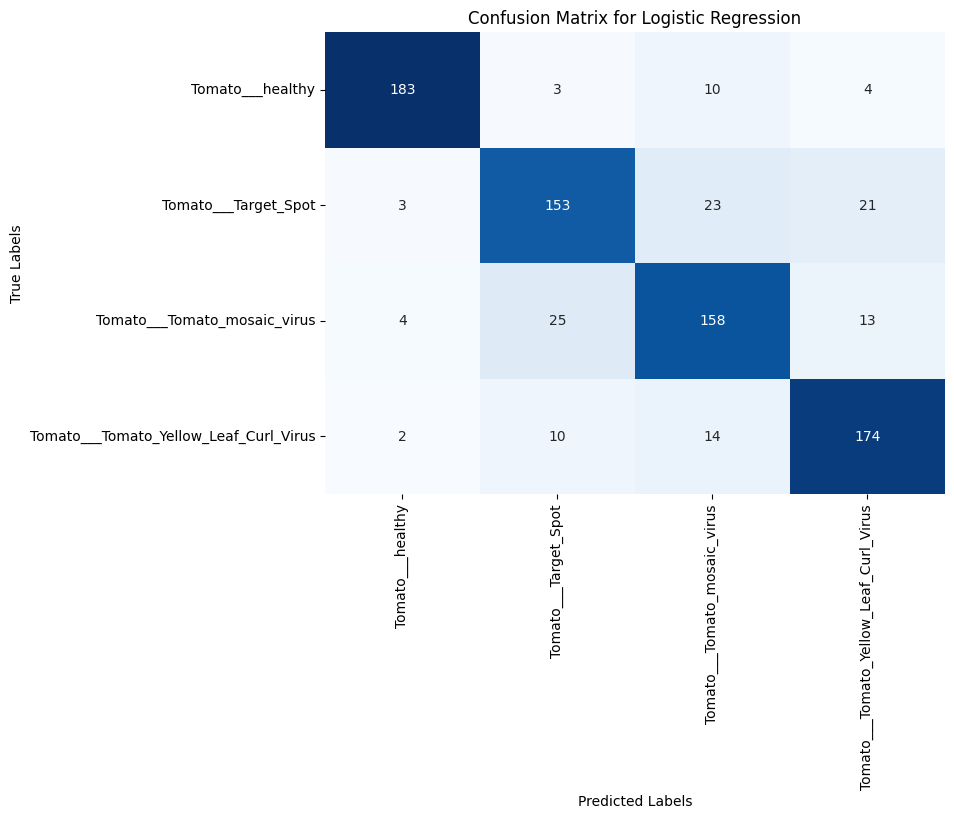

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming logistic_regression_model is the GridSearchCV object for the Logistic Regression model
logistic_regression_best = trained_models['LogisticRegression'].best_estimator_

# Predict on the test data using the best estimator
y_pred_logistic_regression = logistic_regression_best.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic_regression)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming random_forest_model is the GridSearchCV object for the Random Forest model
random_forest_best = trained_models['RandomForestClassifier'].best_estimator_

# Predict on the test data using the best estimator
y_pred_random_forest = random_forest_best.predict(X_test)

# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Accuracy of Random Forest on test data: {accuracy_random_forest:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate precision, recall, specificity, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")



Accuracy of Random Forest on test data: 0.90
Precision: 0.97
Recall/Sensitivity: 0.99
Specificity: 0.97
F1 Score: 0.98


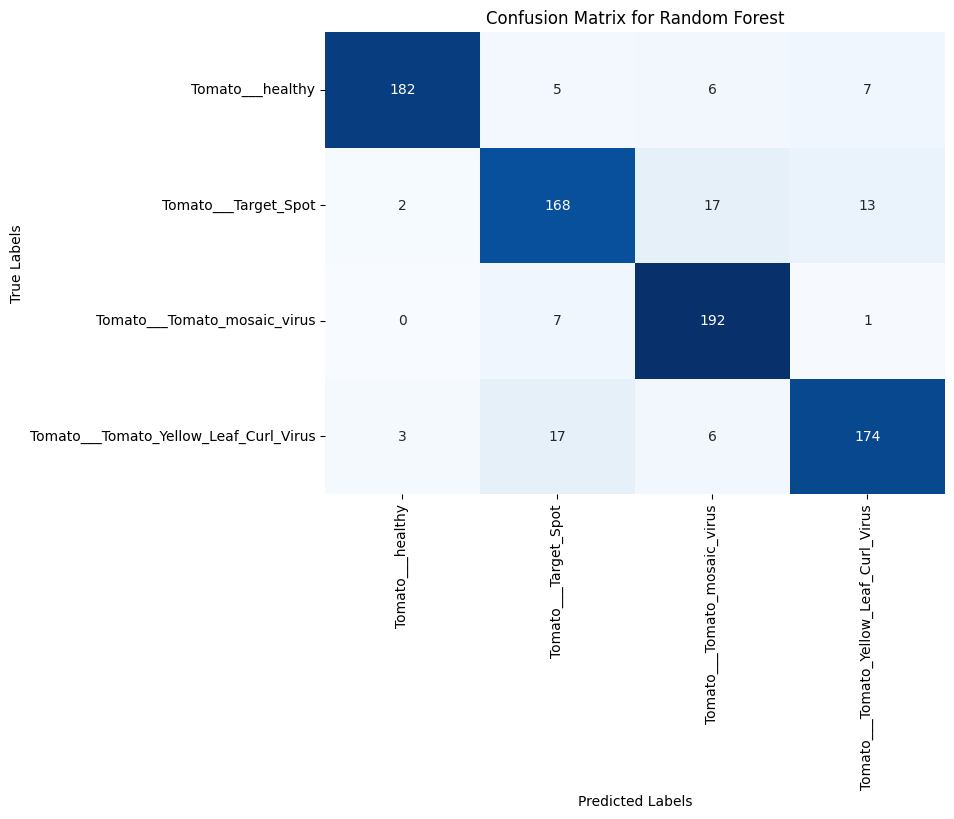

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming random_forest_model is the GridSearchCV object for the Random Forest model
random_forest_best = trained_models['RandomForestClassifier'].best_estimator_

# Predict on the test data using the best estimator
y_pred_random_forest = random_forest_best.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming decision_tree_model is the GridSearchCV object for the Decision Tree model
decision_tree_best = trained_models['DecisionTreeClassifier'].best_estimator_

# Predict on the test data using the best estimator
y_pred_decision_tree = decision_tree_best.predict(X_test)

# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Accuracy of Decision Tree on test data: {accuracy_decision_tree:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate precision, recall, specificity, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")




Accuracy of Decision Tree on test data: 0.88
Precision: 0.97
Recall/Sensitivity: 0.98
Specificity: 0.97
F1 Score: 0.97


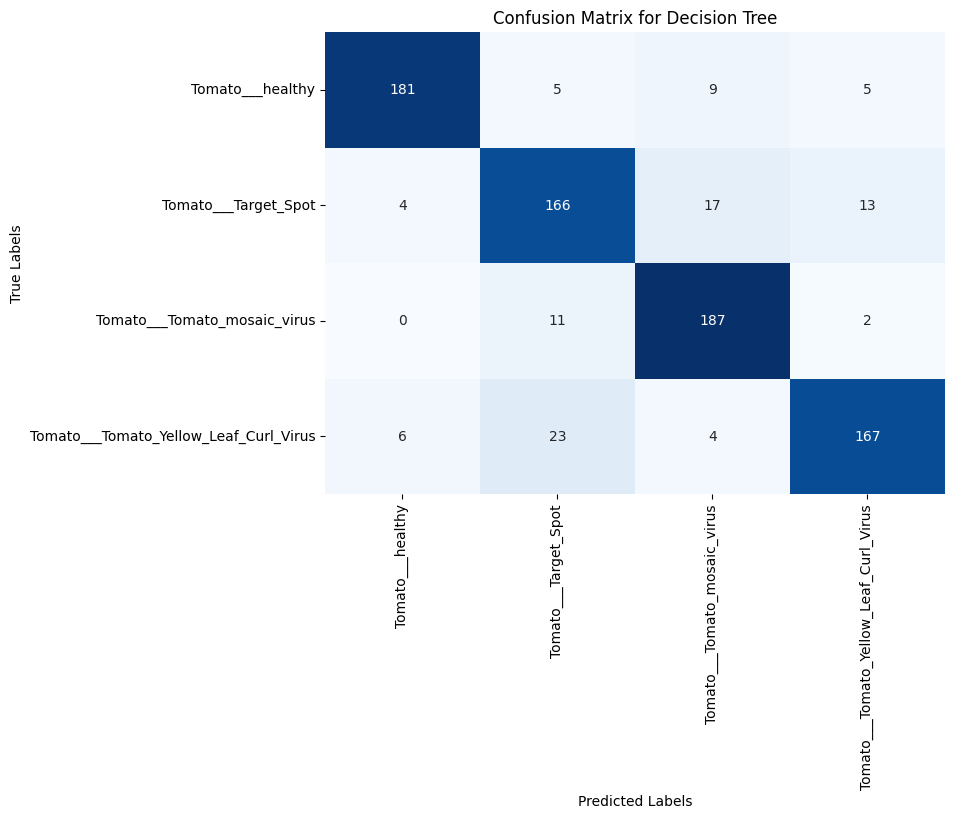

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming decision_tree_model is the GridSearchCV object for the Decision Tree model
decision_tree_best = trained_models['DecisionTreeClassifier'].best_estimator_

# Predict on the test data using the best estimator
y_pred_decision_tree = decision_tree_best.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


##  Fully connected neural network

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [52]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load and preprocess the dataset
def load_dataset(path):
    images = []
    labels = []
    target_names = os.listdir(path)
    for label, target_name in enumerate(target_names):
        label_dir = os.path.join(path, target_name)
        for filename in os.listdir(label_dir):
            filepath = os.path.join(label_dir, filename)
            img = cv2.imread(filepath)
            if img is not None:  # Check if the image is read successfully
                img = cv2.resize(img, (128, 128))  # Resizing to 128x128
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {filepath}")
    return images, labels, target_names

# Load the dataset
train_dir = r"C:\Users\Computing\Desktop\Plant Disease Data"
images, labels, target_names = load_dataset(train_dir)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values of the images
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

# Define the fully connected neural network model
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten the input images
    Dense(128, activation='relu'),       # Dense layer with 128 units and ReLU activation
    Dense(64, activation='relu'),        # Dense layer with 64 units and ReLU activation
    Dense(len(target_names), activation='softmax')  # Output layer with units equal to the number of classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

# Calculate performance metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy of Neural Network on test data: {accuracy_nn:.2f}")


Train on 2972 samples, validate on 744 samples
Epoch 1/10
2972/2972 [==============================] - ETA: 0s - loss: 3.9641 - acc: 0.4404

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2972/2972 [==============================] - 4s 1ms/sample - loss: 3.9641 - acc: 0.4404 - val_loss: 1.8700 - val_acc: 0.5108
Epoch 2/10
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.9984 - acc: 0.6679 - val_loss: 0.8813 - val_acc: 0.6801
Epoch 3/10
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.7649 - acc: 0.7308 - val_loss: 1.8240 - val_acc: 0.6895
Epoch 4/10
2972/2972 [==============================] - 3s 1ms/sample - loss: 1.0853 - acc: 0.6629 - val_loss: 0.7060 - val_acc: 0.7675
Epoch 5/10
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.6671 - acc: 0.7672 - val_loss: 1.0616 - val_acc: 0.7016
Epoch 6/10
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.6604 - acc: 0.7759 - val_loss: 0.5609 - val_acc: 0.8024
Epoch 7/10
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.5316 - acc: 0.8126 - val_loss: 0.4211 - val_acc: 0.8508
Epoch 8/10
2972/2972 [==============================] - 3s 

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of Neural Network on test data: 0.78


In [53]:
def load_dataset(path):
    images = []
    labels = []
    target_names = os.listdir(path)
    for label, target_name in enumerate(target_names):
        label_dir = os.path.join(path, target_name)
        for filename in os.listdir(label_dir):
            filepath = os.path.join(label_dir, filename)
            img = cv2.imread(filepath)
            if img is not None:  # Check if the image is read successfully
                img = cv2.resize(img, (128, 128))  # Resizing to 128x128
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {filepath}")
    return images, labels, target_names

# Load the dataset
train_dir = r"C:\Users\Computing\Desktop\Plant Disease Data"
images, labels, target_names = load_dataset(train_dir)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values of the images
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

# Define the fully connected neural network model
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten the input images
    Dense(128, activation='relu'),       # Dense layer with 128 units and ReLU activation
    Dense(64, activation='relu'),        # Dense layer with 64 units and ReLU activation
    Dense(len(target_names), activation='softmax')  # Output layer with units equal to the number of classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

# Calculate performance metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy of Neural Network on test data: {accuracy_nn:.2f}")


Train on 2972 samples, validate on 744 samples
Epoch 1/15
2944/2972 [============================>.] - ETA: 0s - loss: 3.4690 - acc: 0.4688

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2972/2972 [==============================] - 4s 1ms/sample - loss: 3.4466 - acc: 0.4707 - val_loss: 0.9832 - val_acc: 0.6667
Epoch 2/15
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.8849 - acc: 0.6787 - val_loss: 0.7653 - val_acc: 0.6976
Epoch 3/15
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.7436 - acc: 0.7278 - val_loss: 0.5543 - val_acc: 0.8132
Epoch 4/15
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.6351 - acc: 0.7682 - val_loss: 0.5501 - val_acc: 0.7997
Epoch 5/15
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.7744 - acc: 0.7507 - val_loss: 0.4707 - val_acc: 0.8306
Epoch 6/15
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.5816 - acc: 0.7954 - val_loss: 0.6382 - val_acc: 0.7460
Epoch 7/15
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.4574 - acc: 0.8338 - val_loss: 0.5752 - val_acc: 0.7769
Epoch 8/15
2972/2972 [==============================] - 3s 

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of Neural Network on test data: 0.87


In [54]:
def load_dataset(path):
    images = []
    labels = []
    target_names = os.listdir(path)
    for label, target_name in enumerate(target_names):
        label_dir = os.path.join(path, target_name)
        for filename in os.listdir(label_dir):
            filepath = os.path.join(label_dir, filename)
            img = cv2.imread(filepath)
            if img is not None:  # Check if the image is read successfully
                img = cv2.resize(img, (128, 128))  # Resizing to 128x128
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {filepath}")
    return images, labels, target_names

# Load the dataset
train_dir = r"C:\Users\Computing\Desktop\Plant Disease Data"
images, labels, target_names = load_dataset(train_dir)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values of the images
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

# Define the fully connected neural network model
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten the input images
    Dense(128, activation='relu'),       # Dense layer with 128 units and ReLU activation
    Dense(64, activation='relu'),        # Dense layer with 64 units and ReLU activation
    Dense(len(target_names), activation='softmax')  # Output layer with units equal to the number of classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

# Calculate performance metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy of Neural Network on test data: {accuracy_nn:.2f}")


Train on 2972 samples, validate on 744 samples
Epoch 1/20
2972/2972 [==============================] - ETA: 0s - loss: 2.3315 - acc: 0.5087

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2972/2972 [==============================] - 4s 1ms/sample - loss: 2.3315 - acc: 0.5087 - val_loss: 0.6878 - val_acc: 0.7258
Epoch 2/20
2972/2972 [==============================] - 3s 1ms/sample - loss: 1.0457 - acc: 0.6716 - val_loss: 0.8869 - val_acc: 0.6815
Epoch 3/20
2972/2972 [==============================] - 3s 1ms/sample - loss: 1.3462 - acc: 0.6380 - val_loss: 2.0466 - val_acc: 0.4785
Epoch 4/20
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.6633 - acc: 0.7668 - val_loss: 0.4862 - val_acc: 0.8360
Epoch 5/20
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.5984 - acc: 0.7944 - val_loss: 0.4564 - val_acc: 0.8522
Epoch 6/20
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.6423 - acc: 0.7873 - val_loss: 0.7583 - val_acc: 0.7325
Epoch 7/20
2972/2972 [==============================] - 3s 1ms/sample - loss: 0.4654 - acc: 0.8324 - val_loss: 0.7184 - val_acc: 0.7903
Epoch 8/20
2972/2972 [==============================] - 3s 

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of Neural Network on test data: 0.86


In [55]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
def load_dataset(path, target_size=(128, 128)):
    images = []
    labels = []
    target_names = os.listdir(path)
    for label, target_name in enumerate(target_names):
        label_dir = os.path.join(path, target_name)
        for filename in os.listdir(label_dir):
            filepath = os.path.join(label_dir, filename)
            img = cv2.imread(filepath)
            if img is not None:  # Check if the image is read successfully
                img = cv2.resize(img, target_size)  # Resizing
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {filepath}")
    return images, labels, target_names

# Load the dataset
train_dir = r"C:\Users\Computing\Desktop\Plant Disease Data"
images, labels, target_names = load_dataset(train_dir)

# Preprocessing
X = np.array(images) / 255.0  # Normalization
y = to_categorical(labels)    # One-hot encoding

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model and train it...


In [56]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the dataset
def load_dataset(path, target_size=(128, 128)):
    images = []
    labels = []
    target_names = os.listdir(path)
    for label, target_name in enumerate(target_names):
        label_dir = os.path.join(path, target_name)
        for filename in os.listdir(label_dir):
            filepath = os.path.join(label_dir, filename)
            img = cv2.imread(filepath)
            if img is not None:  # Check if the image is read successfully
                img = cv2.resize(img, target_size)  # Resizing
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {filepath}")
    return images, labels, target_names

# Load the dataset
train_dir = r"C:\Users\Computing\Desktop\Plant Disease Data"
images, labels, target_names = load_dataset(train_dir)

# Preprocessing
X = np.array(images) / 255.0  # Normalization
y = np.array(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(target_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of CNN on test data: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Train on 2972 samples, validate on 744 samples
Epoch 1/10
2972/2972 [==============================] - ETA: 0s - loss: 0.8578 - acc: 0.6514

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2972/2972 [==============================] - 12s 4ms/sample - loss: 0.8578 - acc: 0.6514 - val_loss: 0.3400 - val_acc: 0.8777
Epoch 2/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.3691 - acc: 0.8728 - val_loss: 0.3342 - val_acc: 0.8817
Epoch 3/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.2373 - acc: 0.9172 - val_loss: 0.3245 - val_acc: 0.8884
Epoch 4/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.2317 - acc: 0.9223 - val_loss: 0.2963 - val_acc: 0.8925
Epoch 5/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.1471 - acc: 0.9499 - val_loss: 0.2398 - val_acc: 0.9073
Epoch 6/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.1137 - acc: 0.9610 - val_loss: 0.2407 - val_acc: 0.9113
Epoch 7/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.1339 - acc: 0.9596 - val_loss: 0.2674 - val_acc: 0.9086
Epoch 8/10
2972/2972 [==============================

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of CNN on test data: 0.93
Confusion Matrix:
[[188  12   3  14]
 [  1 190   0   1]
 [  1   1 186   4]
 [ 17  12   0 299]]
Classification Report:
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.91      0.87      0.89       217
       Apple___Black_rot       0.88      0.99      0.93       192
Apple___Cedar_apple_rust       0.98      0.97      0.98       192
         Apple___healthy       0.94      0.91      0.93       328

                accuracy                           0.93       929
               macro avg       0.93      0.93      0.93       929
            weighted avg       0.93      0.93      0.93       929



In [57]:
# Calculate precision, recall, specificity, and F1 score
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.94
Recall/Sensitivity: 0.99
Specificity: 0.94
F1 Score: 0.97


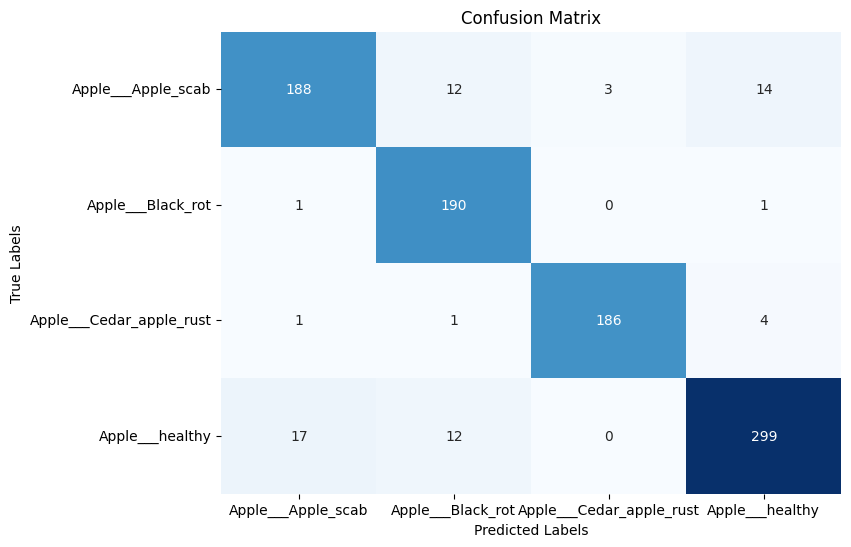

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the actual class labels
actual_labels = ['class1', 'class2', 'class3']  # Replace with your actual class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



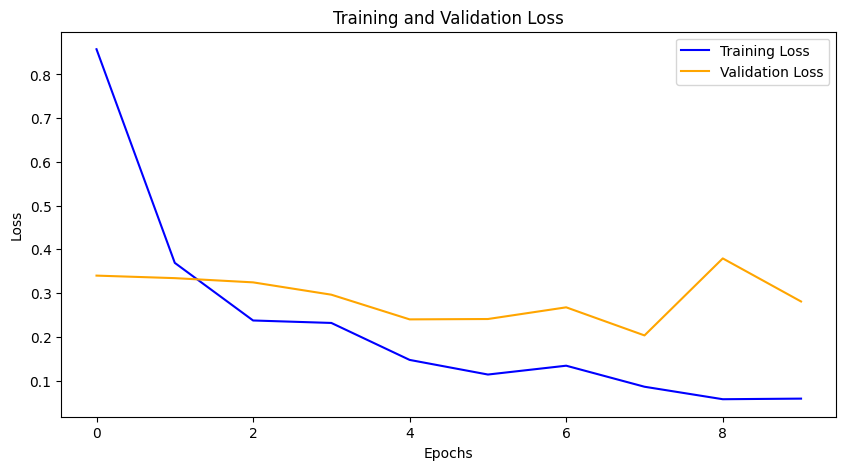

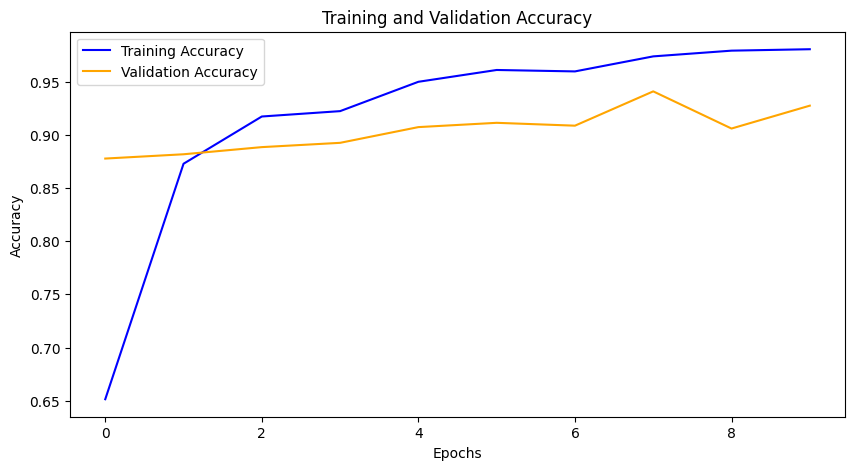

In [64]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy if available
if 'acc' in history.history:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['acc'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_acc'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
else:
    print("Accuracy was not recorded during training.")



# CNN 

Train on 2972 samples, validate on 744 samples
Epoch 1/10
2972/2972 [==============================] - ETA: 0s - loss: 0.7552 - acc: 0.6941

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2972/2972 [==============================] - 12s 4ms/sample - loss: 0.7552 - acc: 0.6941 - val_loss: 0.3589 - val_acc: 0.8763
Epoch 2/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.2867 - acc: 0.8967 - val_loss: 0.2461 - val_acc: 0.9140
Epoch 3/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.2541 - acc: 0.9081 - val_loss: 0.2898 - val_acc: 0.8911
Epoch 4/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.1691 - acc: 0.9394 - val_loss: 0.2027 - val_acc: 0.9234
Epoch 5/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.1421 - acc: 0.9485 - val_loss: 0.1848 - val_acc: 0.9288
Epoch 6/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.0910 - acc: 0.9721 - val_loss: 0.2078 - val_acc: 0.9274
Epoch 7/10
2972/2972 [==============================] - 12s 4ms/sample - loss: 0.0871 - acc: 0.9727 - val_loss: 0.2134 - val_acc: 0.9288
Epoch 8/10
2972/2972 [==============================

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of CNN on test data: 0.89
Confusion Matrix:
[[160   5   7  45]
 [  4 153   0  35]
 [  0   0 190   2]
 [  4   2   2 320]]
Classification Report:
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.95      0.74      0.83       217
       Apple___Black_rot       0.96      0.80      0.87       192
Apple___Cedar_apple_rust       0.95      0.99      0.97       192
         Apple___healthy       0.80      0.98      0.88       328

                accuracy                           0.89       929
               macro avg       0.91      0.87      0.89       929
            weighted avg       0.90      0.89      0.88       929



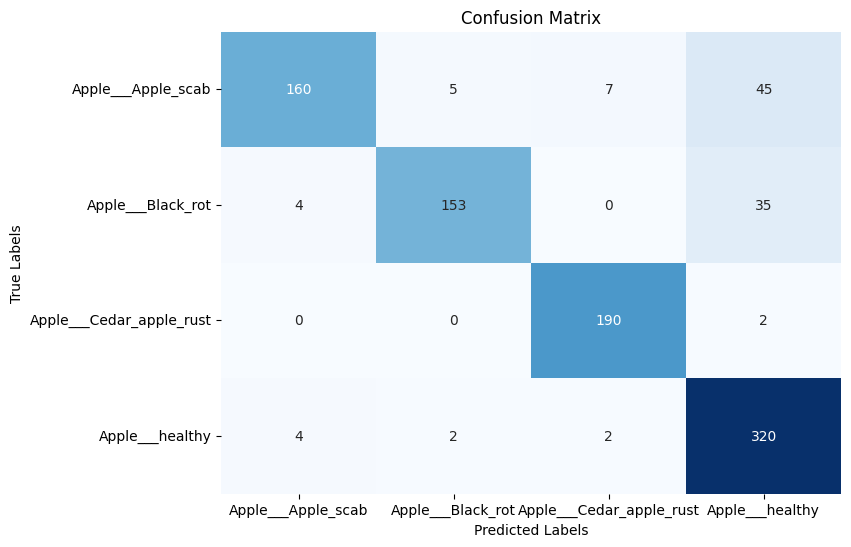

In [73]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
def load_dataset(path, target_size=(128, 128)):
    images = []
    labels = []
    target_names = os.listdir(path)
    for label, target_name in enumerate(target_names):
        label_dir = os.path.join(path, target_name)
        for filename in os.listdir(label_dir):
            filepath = os.path.join(label_dir, filename)
            img = cv2.imread(filepath)
            if img is not None:  # Check if the image is read successfully
                img = cv2.resize(img, target_size)  # Resizing
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {filepath}")
    return images, labels, target_names

# Load the dataset
train_dir = r"C:\Users\Computing\Desktop\Plant Disease Data"
images, labels, target_names = load_dataset(train_dir)

# Preprocessing
X = np.array(images) / 255.0  # Normalization
y = np.array(labels)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(target_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of CNN on test data: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [74]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate precision, recall, specificity, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.97
Recall/Sensitivity: 0.97
Specificity: 0.97
F1 Score: 0.97
